In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/qsar_fish_toxicity.csv",sep=";", names = ["CIC0","SM1_Dz(Z)","GATS1i","NdsCH","NdssC","MLOGP","LC50[-LOG(mol/L)]"])

I then scaled the data in order to make sure all the data points fall within the same range

Before scaling the data, I need to split the dataset into features and the label

In [3]:
#Next I split the dataset into X(the features) and y(the label that we are predicting)
X = df.drop("LC50[-LOG(mol/L)]", axis = 1)
y = df[["LC50[-LOG(mol/L)]"]]


In [6]:
#I then used standard scaler to scale the features, by initializing the StandardScaler and fitting it to the training data
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
0,0.478873,0.468288,0.970369,-0.378635,0.597484,-0.458175
1,-0.938408,-0.113184,-1.092634,-0.378635,-0.564220,-0.531479
2,-1.023101,0.022259,-1.173835,-0.378635,-0.564220,-0.531479
3,0.170538,-0.694657,0.452715,1.274253,-0.564220,-0.211035
4,-1.064124,0.463618,-1.100247,-0.378635,-0.564220,-0.155883


In [7]:
#Examing the first 50 rows of the final df ready for training
X.head(50)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
0,0.478873,0.468288,0.970369,-0.378635,0.597484,-0.458175
1,-0.938408,-0.113184,-1.092634,-0.378635,-0.564220,-0.531479
2,-1.023101,0.022259,-1.173835,-0.378635,-0.564220,-0.531479
3,0.170538,-0.694657,0.452715,1.274253,-0.564220,-0.211035
4,-1.064124,0.463618,-1.100247,-0.378635,-0.564220,-0.155883
5,0.428587,-0.694657,2.241667,-0.378635,-0.564220,-0.979680
6,0.371684,-1.467618,-0.585130,-0.378635,-0.564220,0.581346
7,0.134809,-1.467618,-0.902320,1.274253,-0.564220,0.517816
8,-0.368055,-0.302338,-0.770369,-0.378635,-0.564220,0.581346
9,-0.084863,-1.154697,-0.871870,-0.378635,-0.564220,-0.361832


Next, I split the data set into a training and test set, and set the test set to 0.25, 25% of the dataset

In [29]:
#Using train_test_split I split the datasets into test and training sets and set random_state to 42 to keep it standard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
model.score(X_test, y_test)

0.5689055152662125

ValueError: x and y must be the same size

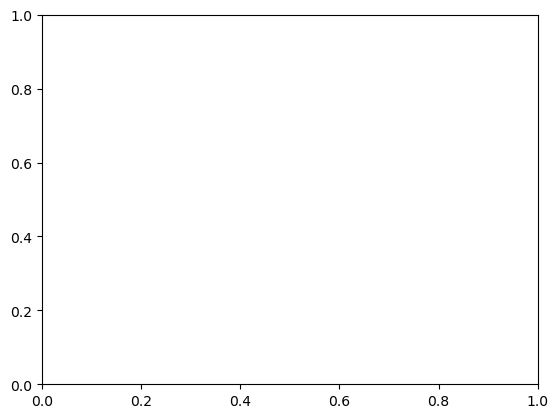

In [45]:
plt.scatter(X_test, y_test)

plt.plot(X_test, y_pred)





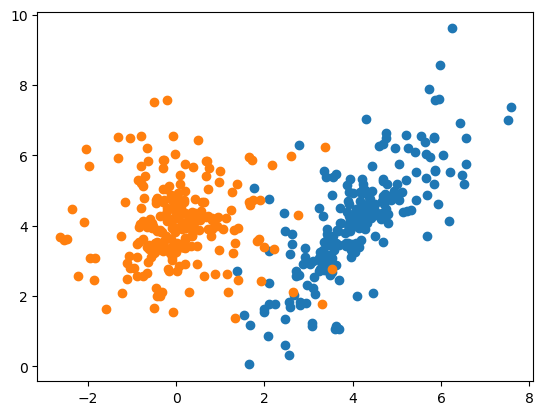

In [14]:
residual = y_test-y_pred
plt.scatter(y_pred, y_test)
plt.scatter(residual, y_pred)